# Football Database 
Football and Betting Statistics of the European Top5 Leagues

**D2TEC – Tecnologias de Big Data**<br />
Especialização em Ciência de Dados - IFSP Campinas

Alunos
- Daniel Vargas Shimamoto
- Diego Machado de Assis

# 0. Informações Gerais

## 0.1. Conhecendo  o dataset

Este conjunto de dados contém dados relacionados ao futebol contendo as cinco principais ligas da Europa entre os anos de 2014-2020. Os dados estão dividos em 7 tabelas e foram coletados das fontes https://understat.com/ e https://www.football-data.co.uk/

Fonte: https://www.kaggle.com/technika148/football-database 

## 0.2. Tabelas:

**Players**
 * PlayerID (Int64): Id dos jogadores (PK)
 * Player Name (Object): Nome dos Jogadores

**Teams**
 * teamID (int64): Id dos Times (PK)
 * name (object): Nome dos times

**Leagues** 
 * leagueID (int64): Id das Ligas (PK)
 * name (object): Nome das ligas
 * understatNotation (object): Nome da liga (em notação understat)

**teamstats**
 * gameID (int64): Id do jogo (PK,FK)
 * teamID (int64): Id dos Times (PK, FK)
 * season (int64): Temporada
 * date (object): Data
 * location (object): Jogo dentro ou fora 
 * goals (int64): Gols
 * XGoals (float64): Expectativa de gols
 * shots (int64): Chutes
 * shotsOnTarget (int64): Chutes no gol
 * deep (int64): Passes realizados a uma distância estimada de 20 jardas do gol (exceto cruzamento)
 * ppda (float64): Passes permitidos por ação defensiva no meio-campo adversário
 * fouls (int64): Faltas
 * corners (int64): Escanteios
 * yellowCard (int64): Cartões amarelos
 * redCards (int64): Cartões vermelhos
 * results (object): Resultado
  
**shots**
 * gameID (int64): Id do jogo (PK,FK)
 * shooterID (int64): Id dos jogadores que chutou(PK, FK)
 * assisterID (float64): Id dos jogadores que deu assistência (PK, FK)
 * minute (int64): minuto
 * situation (object): Situação de jogo
 * lastAction (object): Ultima ação antes de chutar
 * shotType (object): Tipo de chute
 * shotResult (object): Resultado do Chute
 * xGoal (float64): Expectativa de Gol
 * positionX (float64): Posição onde o chute foi feito (lado longo do campo)
 * positionY (float64): Posição onde o chute foi feito (lado curto do campo)

**appearences**
 * gameID (int64): Id do jogo (PK,FK)
 * playerID (int64): Id do Jogador (PK,FK)
 * goals (int64): Gols
 * ownGoals (int64): Gols contras
 * shots (int64): Chutes
 * xGoals (float64): Gols esperados
 * xGoalsChain (float64): Gols esperados de cada posse em que o jogador esteve envolvido
 * xGoalsBuildup (float64): XGoalsChain sem passes chaves e chutes
 * assists (int64): Assistências
 * keyPasses (int64): Passes chaves
 * xAssists (float64): Assistencias esperadas
 * position (object): Possição (
 * positionOrder (int64): Posição (Númerica)
 * yellowCard (int64): Cartões amarelos
 * redCards (int64): Cartões vermelhos
 * time (int64): Time
 * substituteIn (int64): Jogador que entrou
 * substituteOut (int64): Jogador que saiu
 * leagueID (int64): Id das Ligas (PK, FK)
 

**games**
 * leagueID (int64): Id das Ligas (PK, FK)
 * season (int64): Temporada
 * date (object): Data
 * homeTeamID (int64): Id do time mandante(PK, FK)
 * awayTeamID (int64): Id do time visitante (PK, FK)
 * homeGoals (int64): Gols marcados pelo time mandante
 * awayGoals (int64): Gols marcados pelo time visitante
 * homeProbability (float64): Probabilidade estimada de vitória do time mandante
 * drawProbability (float64): Probabilidade estimada de empate
 * awayProbability (float64): Probabilidade estimada de vitória do time visitante
 * homeGoalsHalfTime (int64): Gols marcados pelo time mandante até o intervalo
 * awayGoalsHalfTime (int64): Gols marcados pelo time visitante até o intervalo
 * B365H (float64): 
 * B365D (float64): 
 * B365A (float64): 
 * BWH (float64): 
 * BWD (float64): 
 * BWA (float64): 
 * IWH (float64): 
 * IWD (float64): 
 * IWA (float64): 
 * PSH (float64): 
 * PSD (float64): 
 * PSA (float64): 
 * WHH (float64): 
 * WHD (float64): 
 * WHA (float64): 
 * VCH (float64): 
 * VCD (float64): 
 * VCA (float64): 
 * PSCH (float64): 
 * PSCD (float64): 
 * PSCA (float64): 


![](../assets/FootballDatabase.model.png)

In [1]:
!pip install mysql-connector-python

     |████████████████████████████████| 30.9 MB 19.4 MB/s eta 0:00:01   |▏                               | 112 kB 1.6 MB/s eta 0:00:20     |██████████████████████▏         | 21.4 MB 19.4 MB/s eta 0:00:01


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# Define tconfigurações dos gráficos
sns.set_theme(style='dark', rc={'axes.titlesize': 18, 'axes.labelsize': 14, 'axes.grid.axis': 'y'})

In [2]:
import mysql.connector
from mysql.connector import errorcode

DB_CONFIG = {
    'user': 'd2tec_readonly',
    'password': 'L7pH!yVpXCXzy#p0FDiCg0h2',
    'host': 'd2tec-trabalho1-football-database.cfwkca29qevn.us-east-1.rds.amazonaws.com',
    'database': 'football',
    'raise_on_warnings': True
}

In [3]:
def mysql_connect(config):
    try:
        cnx = mysql.connector.connect(**config)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
            print(f'[CONNECTION ERROR] Invalid credentials: {err}')
        elif err.errno == errorcode.ER_BAD_DB_ERROR:
            print(f'[CONNECTION ERROR] Database does not exist: {err}')
        else:
            print(f'[CONNECTION ERROR] {err}')
        return (None, None)
    else:
        cursor = cnx.cursor()
        return (cnx, cursor)
    
def mysql_close_connection(cnx):
    try:
        cnx.close()
    except mysql.connector.Error as err:
        print(f'[CLOSECONNECTION ERROR] Failes closing connection to mysql: {err}')
        raise

In [30]:
import pandas as pd

def exec_query(query):
    cnx, cursor = mysql_connect(DB_CONFIG)
    cursor.execute(query)
    df = pd.DataFrame(cursor.fetchall(), columns=cursor.column_names)
    mysql_close_connection(cnx)
    return df

## 1) Quais os dez times com maior percentual de vitórias?

### Objetivo
* Encontrar os times que tiveram mais vitórias entre os anos de 2014 até 2020

### Tabelas usadas
* teamstat
* team

### Métodos usados
* <b>Agragação</b>: Sum, Count, Round, Case-When
* <b>Consultas</b>: Subquery, Left Join, Group By, Order By, Limit

In [5]:
question_1 = '''
SELECT
    name as Team,
    sum(wins) as Wins,
    count(wins) as Games,
    ROUND(100 * sum(wins)/count(wins), 2) as Win_rate
FROM (
    SELECT 
        CASE 
            WHEN results = 'W' THEN 1 ELSE 0 
            END AS wins,
        name
    FROM teamstat
    LEFT JOIN team ON teamstat.teamID = team.teamID
) AS G
GROUP BY Team
ORDER BY Win_rate DESC
LIMIT 10
'''

exec_query(question_1)

,Team,Wins,Games,Win_rate
0,Bayern Munich,179,238,75.21
1,Paris Saint Germain,187,255,73.33
2,Juventus,191,266,71.80
3,Barcelona,190,266,71.43
4,Manchester City,183,266,68.80
5,Real Madrid,181,266,68.05
6,Atletico Madrid,163,266,61.28
7,Napoli,163,266,61.28
8,Liverpool,159,266,59.77
9,Roma,150,266,56.39


## 2) Quais são os confrontos que o time visitante tem a maior probabilidade estimada média de ganhar?

### Objetivo
* Encontrar os confrontos onde o time visitante tiveram a maior probabilidade estimada média de vitórias entre os times das principais ligas européias entre os anos de 2014 e 2020

### Tabelas usadas
* game
* team

### Métodos usados
* <b>Agregação</b>: Avg
* <b>Consultas</b>: Subquery, Left Join, Group By, Order By, Limit

In [6]:
question_2 = '''
SELECT 
    A.name as homeTeam,
    team.name as awayTeam,
    avg(homeProbability) as avg_homeProbability,
    avg(drawProbability) as avg_drawProbability,
    avg(awayProbability) as avg_awayProbability
FROM (
    SELECT
        name,
        awayTeamID,
        homeProbability,
        drawProbability,
        awayProbability
    FROM game
    LEFT JOIN team ON game.homeTeamID = team.teamID
) A
LEFT JOIN team ON A.awayTeamID = team.teamID
GROUP BY
    A.name,
    team.name
ORDER BY avg_awayProbability DESC
LIMIT 20
'''

exec_query(question_2)

,homeTeam,awayTeam,avg_homeProbability,avg_drawProbability,avg_awayProbability
0,Cordoba,Barcelona,0.00020,0.00120,0.99860
1,Lecce,Atalanta,0.00050,0.00170,0.99780
2,Spezia,Inter,0.00040,0.02240,0.97720
3,Elche,Barcelona,0.00280,0.02595,0.97125
4,Nancy,Monaco,0.00350,0.02670,0.96980
5,Pescara,Bologna,0.00380,0.03350,0.96270
6,Cardiff,Manchester City,0.00290,0.03520,0.96190
7,Paderborn,Bayern Munich,0.00595,0.03300,0.96105
8,Benevento,Atalanta,0.01265,0.04405,0.94330
9,Fortuna Duesseldorf,Bayern Munich,0.00995,0.04830,0.94175


## 3) Quais jogadores fizeram mais gols e a taxa de gols por chute

### Objetivo
* Encontrar os jogadores que fizeram mais gols entre os anos de 2014-2020 dentro das 5 principais ligas de futebol européia

### Tabelas usadas
* shot
* player

### Métodos usados
* <b>Agregação</b>: Count, Sum, Cast, Case-When
* <b>Consultas</b>: Subquery, Left Join, Group By, Order By, Limit

In [31]:
question_3 = '''
SELECT
    A.*,
    100 * CAST(goals AS FLOAT) / CAST(shots AS FLOAT) AS goal_rate
FROM(
    SELECT 
        player.name as player,
        COUNT(shotResult) as shots,
        SUM(
            CASE 
            WHEN shotResult = 'Goal' 
                THEN 1 
                ELSE 0 
            END) AS goals
    FROM
        shot
    LEFT JOIN player on shot.shooterID = player.playerID
    GROUP BY 
        player.name
) A
ORDER BY goals DESC
LIMIT 10
'''
result_3 = exec_query(question_3)
result_3

,player,shots,goals,goal_rate
0,Lionel Messi,1392,272,19.540230
1,Cristiano Ronaldo,1463,241,16.473001
2,Robert Lewandowski,974,207,21.252567
3,Luis Suárez,811,176,21.701603
4,Harry Kane,889,163,18.335208
5,Pierre-Emerick Aubameyang,698,156,22.349570
6,Sergio Agüero,758,140,18.469657
7,Antoine Griezmann,684,138,20.175439
8,Ciro Immobile,725,133,18.344828
9,Edinson Cavani,560,132,23.571429


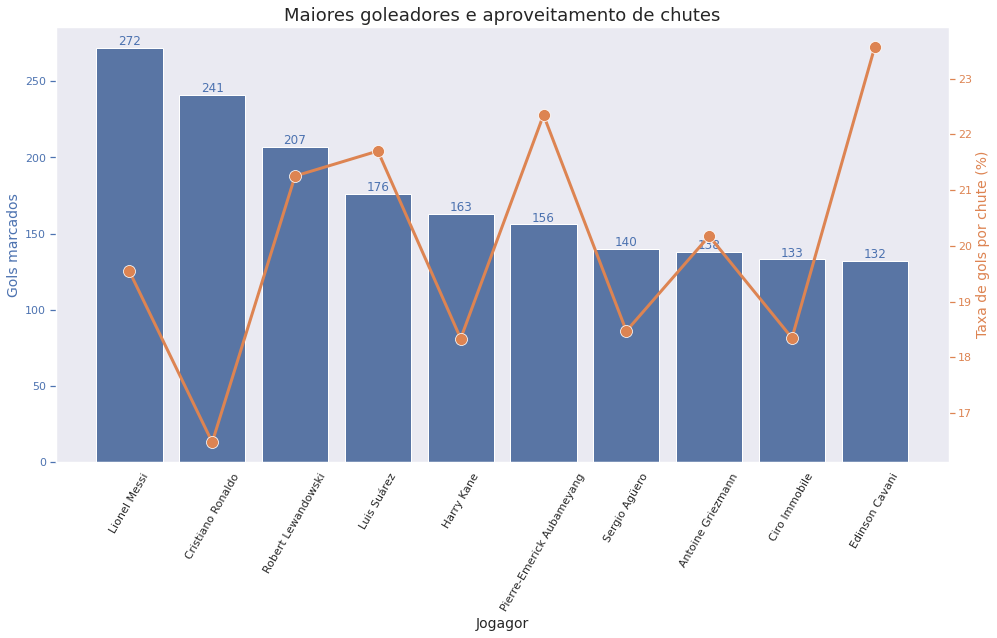

In [98]:
goals_color = sns.color_palette()[0]
rate_color = sns.color_palette()[1]

plt.figure(figsize=(16,8))


ax_goals = sns.barplot(data=result_3, x='player', y='goals', color=goals_color)
ax_goals.set_ylabel("Gols marcados", color=goals_color)
ax_goals.tick_params(axis='y', color=goals_color, labelcolor=goals_color)
ax_goals.bar_label(ax_goals.containers[0], color=goals_color)


ax_rate = ax_goals.twinx()
sns.lineplot(ax=ax_rate, data=result_3, x='player', y='goal_rate', color=rate_color, linewidth=3, marker='o', markersize=12)
ax_rate.set_ylabel("Taxa de gols por chute (%)", color=rate_color)
ax_rate.tick_params(axis='y', color=rate_color, labelcolor=rate_color)

ax_goals.set(title="Maiores goleadores e aproveitamento de chutes", xlabel='Jogagor')
ax_goals.tick_params(axis='x', rotation=60)
plt.show()

## 4) Qual jogador participou de mais gols (Assistencia + Gol) ?

### Objetivo
* Encontrar os jogadores que mais participaram de gols (assitencia + gol) entre os anos de 2014-2020 dentro das 5 principais ligas de futebol européia

### Tabelas usadas
* shot
* player

### Métodos usados
* <b>Agregação</b>: Sum, Case-When
* <b>Consultas</b>: CTE, Left Join, Where, Order By, Limit

In [8]:
question_4 = '''
WITH 
t_goals AS(
    SELECT
        player.name as player,
        SUM(
            CASE 
            WHEN shotResult = 'Goal' THEN 1 
                ELSE 0 
            END) AS goals
    FROM
        shot
    LEFT JOIN player on shot.shooterID = player.playerID
    GROUP BY player.name
),

t_assistence AS(
    SELECT
        player.name as assist_player,
        SUM(
            CASE 
            WHEN shotResult = 'Goal' THEN 1 
                ELSE 0 
            END) AS assistence
    FROM
        shot
    LEFT JOIN player on shot.assisterID = player.playerID

    GROUP BY 
        player.name
)

SELECT
    t_assistence.assist_player player,
    t_assistence.assistence,
    t_goals.goals,
    t_assistence.assistence + t_goals.goals as total_participation
FROM
    t_assistence
LEFT JOIN 
    t_goals on t_assistence.assist_player = t_goals.player

WHERE 
    player <> 'None'
ORDER BY
    total_participation DESC
LIMIT 10
'''

exec_query(question_4)

,player,assistence,goals,total_participation
0,Lionel Messi,97,272,369
1,Luis Suárez,146,176,322
2,Cristiano Ronaldo,54,241,295
3,Robert Lewandowski,32,207,239
4,Harry Kane,34,163,197
5,Neymar,61,128,189
6,Pierre-Emerick Aubameyang,31,156,187
7,Mohamed Salah,53,130,183
8,Antoine Griezmann,42,138,180
9,Karim Benzema,55,123,178


## 5) Quais times mais ganharam como visitante?

### Objetivo
* Encontrar os times que mais venceram como visitante entre os anos de 2014-2020 dentro das 5 principais ligas de futebol européia

### Tabelas usadas
* game
* team

### Métodos usados
* <b>Agregação</b>: Case-When
* <b>Consultas</b>: Cte, Left Join, Where, Group By, Order By, Limit


In [9]:
question_5 = '''
with t_win as(
SELECT
    name,
    CASE 
        WHEN homeGoals > awayGoals THEN 'homeWin'
        WHEN homeGoals < awayGoals THEN 'awayWin'
        WHEN homeGoals = awayGoals THEN 'draw'
        ELSE 'not_a_result'
    END as Wining
FROM
    game
LEFT JOIN
    team on game.awayTeamID = team.teamID
)
SELECT
    name,
    count(Wining) as awayVictoryTotal
FROM
    t_win
WHERE
    Wining ='awayWin'
GROUP BY
    name
ORDER BY
    awayVictoryTotal DESC
LIMIT 20
'''
exec_query(question_5)

,name,awayVictoryTotal
0,Barcelona,85
1,Paris Saint Germain,85
2,Bayern Munich,84
3,Manchester City,84
4,Real Madrid,82
5,Juventus,80
6,Napoli,74
7,Liverpool,72
8,Chelsea,69
9,Atletico Madrid,66


## 6) Qual time fez mais gols em uma única temporada?

### Objetivo
* Encontrar os times que mais fizeram gols em uma única temporada entre os anos de 2014-2020 dentro das 5 principais ligas de futebol européia

### Tabelas usadas
* teamstat
* team

### Métodos usados
* <b>Agregação</b>: Sum, Count, Cast 
* <b>Consultas</b>: Left Join, Group By, Order By, Limit

In [10]:
question_6 = '''
SELECT
    team.name AS team,
    season,
    SUM(goals) AS goals,
    COUNT(*) AS games,
    CAST(SUM(goals) AS FLOAT)/CAST(count(*) AS FLOAT) AS goals_per_game
FROM
    teamstat
LEFT JOIN 
    team ON teamstat.teamID = team.teamID
GROUP BY
    team,
    season
ORDER BY
    goals DESC
LIMIT 20
'''
exec_query(question_6)

,team,season,goals,games,goals_per_game
0,Real Madrid,2014,118,38,3.105263
1,Barcelona,2016,116,38,3.052632
2,Barcelona,2015,112,38,2.947368
3,Barcelona,2014,110,38,2.894737
4,Real Madrid,2015,110,38,2.894737
5,Paris Saint Germain,2017,108,38,2.842105
6,Monaco,2016,107,38,2.815789
7,Manchester City,2017,106,38,2.789474
8,Real Madrid,2016,106,38,2.789474
9,Paris Saint Germain,2018,105,38,2.763158


## 7) Quais jogadores tomaram mais cartões (Amarelo + Vermelho)

### Objetivo
* Encontrar os jogadores que mais foram penalizados com cartões (Amarelo + Vermelho) entre os anos de 2014-2020 dentro das 5 principais ligas de futebol européia

### Tabelas usadas
* appearance
* player

### Métodos usados
* <b>Agregação</b>: Sum
* <b>Consultas</b>: Left Join, Group By, Order By, Limit

In [12]:
question_7 = '''
SELECT
    name,
    sum(redCards) as totalRedCard,
    sum(yellowCard) as totalYellowCard,
    sum(redCards) + sum(yellowCard) as totalCard
FROM
    appearance
LEFT JOIN player ON appearance.playerID = player.playerID
GROUP BY
    name
ORDER BY
    totalCard DESC
LIMIT 10
'''

exec_query(question_7)

,name,totalRedCard,totalYellowCard,totalCard
0,Danilo,6,83,89
1,Raúl García,2,81,83
2,Dani García,2,80,82
3,Álvaro González,4,74,78
4,Damián Suárez,4,71,75
5,Felipe,5,67,72
6,Recio,1,69,70
7,Víctor Sánchez,3,65,68
8,Rubén Pérez,1,66,67
9,Tomás Rincón,1,66,67


## 8) Considerando os times que terminaram o primeiro tempo perdendo, quantos terminaram o jogo perdendo, ganhando ou empatando?

### Objetivo
* Descobrir a quantidade de resultados que são revertidos nos jogos onde um time está ganhando até o final do primeiro tempo durante os anos de 2014-2020 dentro das 5 principais ligas de futebol européia

### Tabelas usadas
* game

### Métodos usados
* <b>Agregação</b>: Count, Case-When, 
* <b>Consultas</b>: Subquery, Union, Group By, Where

In [239]:
question_8 = '''
SELECT
    result,
    COUNT(team) as games
FROM (
    (
        SELECT
            homeTeamID as team,
            homeGoalsHalfTime,
            awayGoalsHalfTime,
            homeGoals,
            awayGoals,
            CASE
                WHEN homeGoals < awayGoals THEN 'lose'
                WHEN homeGoals = awayGoals THEN 'draw'
                WHEN homeGoals > awayGoals THEN 'win'
            END AS result
        FROM game
        WHERE homeGoalsHalfTime < awayGoalsHalfTime
    )
    UNION
    (
        SELECT
            awayTeamID as team,
            homeGoalsHalfTime,
            awayGoalsHalfTime,
            homeGoals,
            awayGoals,
            CASE
                WHEN homeGoals > awayGoals THEN 'lose'
                WHEN homeGoals = awayGoals THEN 'draw'
                WHEN homeGoals < awayGoals THEN 'win'
            END AS result
        FROM game
        WHERE homeGoalsHalfTime > awayGoalsHalfTime
    )
) as r
GROUP BY result
'''

result_8 = exec_query(question_8)
result_8

,result,games
0,draw,650
1,lose,3311
2,win,394


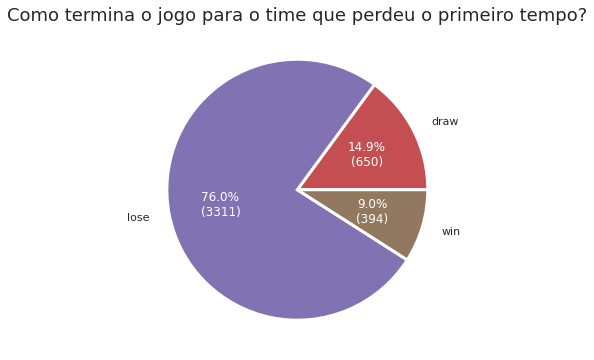

In [253]:
import numpy as np

fig, ax = plt.subplots(figsize=(18, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(result_8.games, autopct=lambda pct: func(pct, result_8.games),
                                  textprops=dict(color="w"))

ax.pie(result_8.games, labels=result_8.result, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.setp(autotexts, size=12)

ax.set_title("Como termina o jogo para o time que perdeu o primeiro tempo?")

plt.show()

## 9) Quem foi artilheiro de cada liga por temporada?

### Objetivo
* Encontrar os jogadores que mais marcaram gols durante apenas uma temporada entre os anos de 2014-2020 em cada uma das 5 principais ligas de futebol européia

### Tabelas usadas
* appearance
* game
* player
* league

### Métodos usados
* <b>Agregação</b>: Sum, Max
* <b>Consultas</b>: CTE, Inner Join, Left Join, Group By, Order By

In [206]:
question_9 = '''
WITH t_goals AS (
SELECT
    league.name AS league,
    game.season AS season,
    player.name AS player,
    SUM(appearance.goals) AS goals
FROM appearance
LEFT JOIN game ON game.gameID = appearance.gameID
LEFT JOIN player ON player.playerID = appearance.playerID
LEFT JOIN league ON league.leagueID = appearance.leagueID
GROUP BY
    league.name,
    game.season,
    player.name
),

t_play AS (
SELECT
    t_goals.league,
    t_goals.season,
    t_goals.player,
    t_goals.goals
FROM t_goals
INNER JOIN (
    SELECT
        league,
        season,
        MAX(goals) max_goals
    FROM t_goals
    GROUP BY league, season
) t
ON
    t_goals.league = t.league AND
    t_goals.season = t.season AND
    t_goals.goals = t.max_goals
)

SELECT
    league,
    season,
    GROUP_CONCAT(player) AS player,
    goals
FROM t_play
GROUP BY league, season, goals 
ORDER BY league, season
'''

result_9 = exec_query(question_9)
result_9

,league,season,player,goals
0,Bundesliga,2014,Alexander Meier,19
1,Bundesliga,2015,Robert Lewandowski,30
2,Bundesliga,2016,Pierre-Emerick Aubameyang,31
3,Bundesliga,2017,Robert Lewandowski,29
4,Bundesliga,2018,Robert Lewandowski,22
5,Bundesliga,2019,Robert Lewandowski,34
6,Bundesliga,2020,Robert Lewandowski,41
7,La Liga,2014,Cristiano Ronaldo,48
8,La Liga,2015,Luis Suárez,40
9,La Liga,2016,Lionel Messi,37


In [207]:
result_9["goals"] = pd.to_numeric(result_9["goals"], downcast='integer')
league_position = { league:pos for pos, league in enumerate(result_9.league.unique()) }

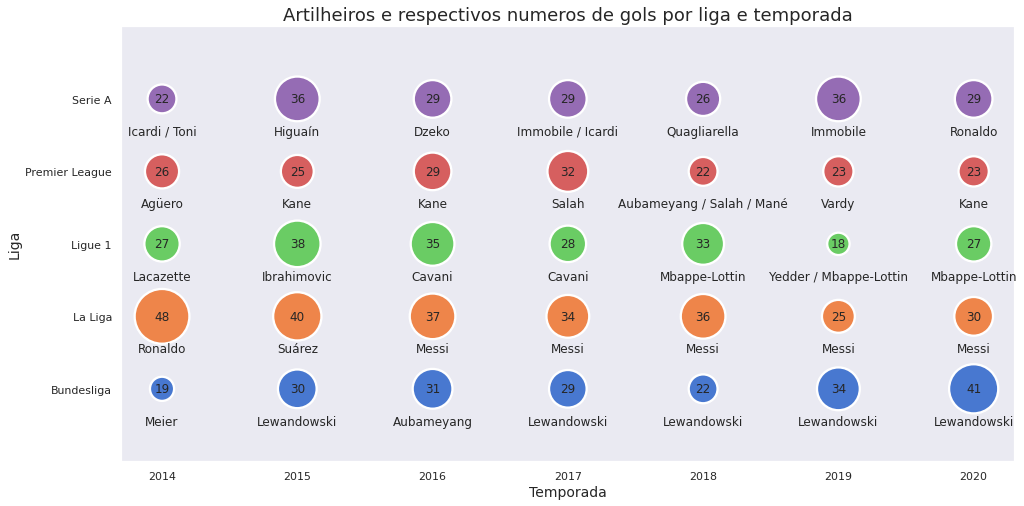

In [238]:
plt.figure(figsize=(16,8))

ax = sns.scatterplot(
    data=result_9,
    x='season',
    y='league',
    hue='league',
    size='goals',
    sizes=(500, 3000),
    palette='muted',
    legend=False
)

for _, row in result_9.iterrows():
    plt.text(
        x=row.season,
        y=row.league,
        s=row.goals,
        ha='center',
        va='center'
    )
    plt.text(
        x=row.season,
        y=league_position.get(row.league) - 0.5,
        s=' / '.join(map(lambda x: x.split(" ")[-1], row.player.split(","))),
        ha='center'
    )

ax.set(title='Artilheiros e respectivos numeros de gols por liga e temporada', xlabel='Temporada', ylabel='Liga')
plt.ylim(-1, 5)
plt.show()

## 10) Quais foram os maiores azarões a vencer?

### Objetivo
* Encontrar os que tinham menores probabilidades de vitórias e ganharam os confrontos durante os anos de 2014-2020 nas 5 principais ligas de futebol européia

### Tabelas usadas
* game
* league
* team
* teamstat

### Métodos usados
* <b>Agregação</b>: Case-When
* <b>Consultas</b>: Subquery, Left Join, Where, Order By

In [123]:
question_10 = '''
SELECT
    league,
    season,
    CASE
        WHEN homeProbability < awayProbability THEN homeTeam
        WHEN homeProbability > awayProbability THEN awayTeam
    END as winer,
    CASE
        WHEN homeProbability > awayProbability THEN homeTeam
        WHEN homeProbability < awayProbability THEN awayTeam
    END as loser,
    CASE
        WHEN homeProbability < awayProbability THEN homeProbability
        WHEN homeProbability > awayProbability THEN awayProbability
    END as probability
FROM (
    SELECT
        league.name as league,
        game.season,
        homeProbability,
        awayProbability,
        homeTeam.name as homeTeam,
        awayTeam.name as awayTeam
    FROM game
    LEFT JOIN league ON league.leagueID = game.leagueID
    LEFT JOIN team as homeTeam ON homeTeam.teamID = game.homeTeamID
    LEFT JOIN team as awayTeam ON awayTeam.teamID = game.awayTeamID
    LEFT JOIN teamstat ON game.gameID = teamstat.gameID
    WHERE
        (homeProbability < awayProbability AND teamstat.teamID = game.homeTeamID and results = 'W') OR
        (homeProbability > awayProbability AND teamstat.teamID = game.awayTeamID and results = 'W')
) as p
ORDER BY probability
'''

exec_query(question_10).head(20)

,league,season,winer,loser,probability
0,Ligue 1,2020,Nice,Lens,0.0009
1,Ligue 1,2014,SC Bastia,Rennes,0.0033
2,Premier League,2019,Tottenham,Manchester City,0.0069
3,Bundesliga,2015,Schalke 04,Borussia M.Gladbach,0.0076
4,Premier League,2015,Stoke,West Ham,0.0079
5,Premier League,2020,Crystal Palace,Brighton,0.0081
6,Premier League,2020,West Bromwich Albion,Brighton,0.0135
7,La Liga,2020,Eibar,Sevilla,0.0139
8,Premier League,2018,Brighton,Crystal Palace,0.0150
9,La Liga,2014,Malaga,Deportivo La Coruna,0.0155


## XXXXX Qual time mais venceu em cada liga por temporada?

In [28]:
question_10 = '''
SELECT
    game.gameID,
    game.leagueID,
    game.season,
    game.date,
    game.homeTeamID,
    game.awayTeamID,
    teamstat.gameID,
    teamstat.teamID,
    teamstat.season,
    teamstat.date,
    teamstat.results,
    team.name
FROM game
INNER JOIN (
    SELECT
        leagueID,
        season,
        MAX(date) AS date
    FROM game
    GROUP BY leagueID, season
) g ON
    game.leagueID = g.leagueID AND
    game.season = g.season AND
    game.date = g.date
LEFT JOIN teamstat
    ON  teamstat.gameID = game.gameID
    AND teamstat.teamID IN (game.homeTeamID, game.awayTeamID)
LEFT JOIN team ON team.teamID = teamstat.teamID
WHERE teamstat.results = 'W'
AND game.season < 2020
'''

exec_query(question_10)

,gameID,leagueID,season,date,homeTeamID,awayTeamID,gameID,teamID,season,date,results,name
0,460,1,2015,2016-05-17 23:00:00,89,73,460,89,2015,2016-05-17 23:00:00,W,Manchester United
1,928,2,2015,2016-05-15 22:45:00,99,103,928,103,2015,2016-05-15 22:45:00,W,Carpi
2,929,2,2015,2016-05-15 22:45:00,96,110,929,110,2015,2016-05-15 22:45:00,W,Fiorentina
3,930,2,2015,2016-05-15 22:45:00,100,94,930,100,2015,2016-05-15 22:45:00,W,Palermo
4,1318,3,2015,2016-05-14 17:30:00,121,118,1318,118,2015,2016-05-14 17:30:00,W,Hamburger SV
...,...,...,...,...,...,...,...,...,...,...,...,...
173,12708,3,2019,2020-06-27 13:30:00,240,233,12708,240,2019,2020-06-27 13:30:00,W,Union Berlin
174,12982,5,2019,2020-03-08 19:00:00,160,178,12982,160,2019,2020-03-08 19:00:00,W,Lille
175,13461,2,2019,2020-08-02 18:45:00,104,99,13461,99,2019,2020-08-02 18:45:00,W,Udinese
176,13466,2,2019,2020-08-02 18:45:00,101,94,13466,101,2019,2020-08-02 18:45:00,W,Genoa
